# Module 7 Exercises - Linear Regression

### Exercise 1:

Using the pandas library, in the datasets folder load the gradedata.csv file as a dataframe. Narrow your data (make the dataframe smaller) by choosing columns that you think can help predict student grades. Use any method that you've learned so far to help your decision on which columns to keep. 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn #library for predictive modeling
%matplotlib inline

In [7]:
location = 'datasets/gradedata.csv '
df = pd.read_csv(location) 
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [8]:
df.keys()

Index(['fname', 'lname', 'gender', 'age', 'exercise', 'hours', 'grade',
       'address'],
      dtype='object')

In [11]:
stats_df = df.drop(['gender','lname','fname', 'age','address'], axis=1)
stats_df.head()

,exercise,hours,grade
0,3,10,82.4
1,4,4,78.2
2,5,9,79.3
3,2,7,83.2
4,4,15,87.4


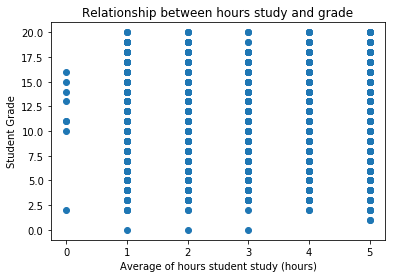

In [12]:
#compare number of rooms to home price
plt.scatter(stats_df['exercise'], stats_df['hours']) 
plt.xlabel("Average of hours student study (hours)") 
plt.ylabel("Student Grade") 
plt.title("Relationship between hours study and grade") 
plt.show()

### Exercise 2:

Using the dataframe in the exercise above, clean and prepare your data. This means to eliminate any null (missing) values (either by dropping or filling them) and to transform any data column types to numerical values that a model can interpret. For example, if the column has string values, convert them to integers that best represent their order.

In [31]:
stats_df_no_missing = df.dropna()
stats_df_no_missing.count()

fname       2000
lname       2000
gender      2000
age         2000
exercise    2000
hours       2000
grade       2000
address     2000
dtype: int64

In [32]:
def numeric_collumn(x):
    if X== 'training':
        return 1
    if x=='test':
        return 0
df.tail()

,fname,lname,gender,age,exercise,hours,grade,address
1995,Cody,Shepherd,male,19,1,8,80.1,"982 West Street, Alexandria, VA 22304"
1996,Geraldine,Peterson,female,16,4,18,100.0,"78 Morris Street, East Northport, NY 11731"
1997,Mercedes,Leon,female,18,3,14,84.9,"30 Glenridge Rd., Bountiful, UT 84010"
1998,Lucius,Rowland,male,16,1,7,69.1,"342 West Meadowbrook Lane, Helena, MT 59601"
1999,Linus,Morris,male,19,4,10,79.6,"81 Homestead Drive, Voorhees, NJ 08043"


In [28]:
from sklearn.linear_model import LinearRegression

#make dataframe that only contains predictive features
X = df.drop(['fname','lname','gender','address'], axis=1)

#assign linear regression function to a variable
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, df.grade, test_size=0.30, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1400, 4)
(600, 4)
(1400,)
(600,)


lm.predict(x)[0:5]

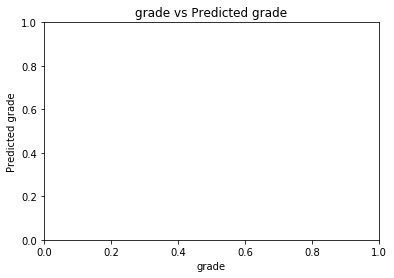

In [38]:

plt.xlabel("grade")
plt.ylabel("Predicted grade")
plt.title("grade vs Predicted grade")
plt.show()

### Exercise 4:

Using the training data from the previous exercise, set a linear regression function to fit the data (build the model).

In [49]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, df.grade, test_size=0.30, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1400, 4)
(600, 4)
(1400,)
(600,)


In [50]:
lm.fit(X_train,Y_train)
pred_train = lm.predict(X_train)
pred_train = lm.predict(X_test)


In [51]:

print(lm.score(X_train,Y_train))
print(lm.score(X_test,Y_test))

1.0
1.0


### Exercise 5:

What is the intercept coefficient (y-intercept) for the linear regression model?

In [52]:
print('Estimatedintercept coefficient:', lm.intercept_)

Estimatedintercept coefficient: -5.684341886080802e-14


### Exercise 6:

Use the predict function on the training data and the test data.

In [54]:
lm.predict(X)[0:5]

array([82.4, 78.2, 79.3, 83.2, 87.4])

### Exercise 7:

Calculate the score of the training and test predictions. How "good" was the linear regression model at predicting the test data compared to the training data?

In [55]:
print(lm.score(X_train,Y_train))
print(lm.score(X_test,Y_test))

1.0
1.0
